Implementation of MCP Neuron for AND and OR Function.

In [4]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This function implements a basic AND operation using an MCP Neuron for two inputs.

    Parameters:
    X1 (1D array-like): An array of binary values (0 or 1).
    X2 (1D array-like): An array of binary values (0 or 1).
    T (int): Threshold value.

    Returns:
    list: Neuron state (1 or 0) for each input pair.
    """
    assert len(X1) == len(X2), "Input arrays must have the same length."

    # Compute element-wise sum of the inputs
    summed_inputs = [x1 + x2 for x1, x2 in zip(X1, X2)]

    # Apply thresholding function
    state_neuron = [1 if s >= T else 0 for s in summed_inputs]

    return state_neuron


Sample Usage for ”AND” Function.

In [5]:

# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")

Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


For ”OR” Operations.

In [6]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements a basic OR operation using an MCP Neuron for two inputs.

    Parameters:
    X1 (1D array-like): An array of binary values (0 or 1).
    X2 (1D array-like): An array of binary values (0 or 1).
    T (int): Threshold value.

    Returns:
    list: Neuron state (1 or 0) for each input pair.
    """
    assert len(X1) == len(X2), "Input arrays must have the same length."

    # Compute element-wise sum of the inputs
    summed_inputs = [x1 + x2 for x1, x2 in zip(X1, X2)]

    # Apply thresholding function
    state_neuron = [1 if s >= T else 0 for s in summed_inputs]

    return state_neuron

Sample Usage for ”OR” Function.

In [7]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")

Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


Question - 1: List out all the limitations of MCP - Neurons.

answer:

1. Lack of Learning Ability – MCP neurons have fixed weights and thresholds, meaning they cannot learn from data or adjust parameters based on experience.

2. Limited to Binary Outputs – The activation function in MCP neurons produces only binary outputs (0 or 1), making them unsuitable for problems requiring continuous or multi-class outputs.

3. Inability to Handle Non-Linearly Separable Problems – MCP neurons can only solve linearly separable problems, such as AND and OR, but fail with non-linearly separable ones like XOR.

4. No Concept of Weights in the Original Model – The initial MCP neuron model does not include the concept of adjustable weights, which limits its flexibility in decision-making.

5. No Support for Multi-Layer Networks – MCP neurons function as single-layer perceptrons and cannot form deep networks, which are necessary for solving complex problems.

6. Sensitive to Input Representation – The performance of MCP neurons heavily depends on the binary representation of inputs, making them impractical for real-world problems involving continuous data.

7. 8. Lack of Generalization – Since MCP neurons work on strict threshold logic, they cannot generalize well to noisy or varied data inputs.

9. No Support for Probabilistic Decision Making – MCP neurons make rigid, deterministic decisions without accommodating probabilities or uncertainties.

Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.

single MCP neuron cannot solve XOR but we can combine multiple MCP neurons in a 2-layer network to achieve XOR functionality


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Implementation for 0 Vs. 1 Classification.

Step 1: Load the Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


Question - 1: What does the shape of X represent?

The shape of
𝑋
X is (12665, 784), which represents the feature matrix for the MNIST dataset.

Question - 2: What does the shape of X represent?


Viewing the Dataset.

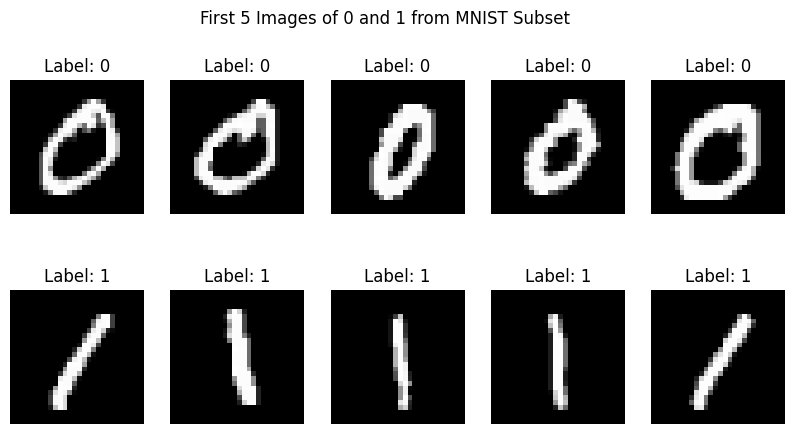

In [10]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

Step - 2 - Initializing the Weights:

In [13]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

Question - 3: What does the weights array represent in this context?

he weights array  refers to the parameters (coefficients) of a model that learns to classify digits

Question - 4: Why are we initializing the weights to zero? What effect could thi shave on the training process?


Step - 3 - Make a Decision function:

In [14]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data (0 or 1)
    """
    # Compute linear combination of inputs and weights
    predictions = np.dot(X, weights) + bias

    # Apply step function (threshold at 0)
    y_pred_all = np.where(predictions >= 0, 1, 0)

    return y_pred_all


Step - 4 - Implement the Perceptron Learning Algorithm

In [15]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct predictions at the last epoch.
    """
    n_samples = X.shape[0]

    for _ in range(epochs):
        correct_predictions = 0
        for i in range(n_samples):
            # Compute prediction using step function
            linear_output = np.dot(X[i], weights) + bias
            y_pred = 1 if linear_output >= 0 else 0

            # Update weights and bias if prediction is incorrect
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
            else:
                correct_predictions += 1

    # Compute accuracy at the last epoch
    accuracy = correct_predictions / n_samples

    return weights, bias, accuracy

Training the Perceptron

In [16]:

# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  1.0


Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?

to calculate the output of the model for the
𝑖
i-th input data point
Question - 6: What happens when the prediction is wrong? How are the weights and
bias updated?

Question - 7:Why is the final accuracy important, and what do you expect it to be?


Step 5: Visualize Misclassified Images

In [17]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


Question - 8:What does misclassified idx store, and how is it used in this code?

9: How do you interpret the result if the output is ”All images were
correctly classified!”?

Task 3: Perceptron Algorithm for 3 vs 5 Classification.

Step 1: Load the Dataset

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/mnist_3_and_5.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


Viewing the Dataset.

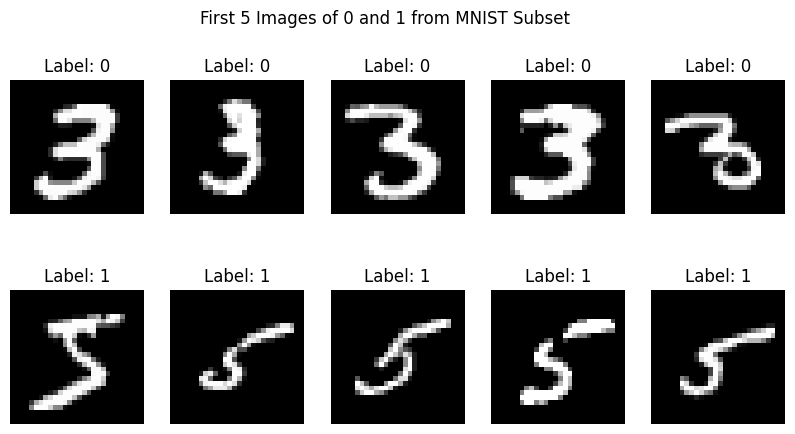

In [28]:
# Separate images for label 0 and label 1
images_0 = X[y == 3]  # Get all images with label 0
images_1 = X[y == 5]  # Get all images with label 5

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()


 Initializing the Weights:

In [29]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

 Make a Decision function:

In [30]:
def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data (0 or 1)
    """
    # Compute linear combination of inputs and weights
    predictions = np.dot(X, weights) + bias

    # Apply step function (threshold at 0)
    y_pred_all = np.where(predictions >= 0, 1, 0)

    return y_pred_all


Implement the Perceptron Learning Algorithm

In [31]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct predictions at the last epoch.
    """
    n_samples = X.shape[0]

    for _ in range(epochs):
        correct_predictions = 0
        for i in range(n_samples):
            # Compute prediction using step function
            linear_output = np.dot(X[i], weights) + bias
            y_pred = 1 if linear_output >= 0 else 0

            # Update weights and bias if prediction is incorrect
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
            else:
                correct_predictions += 1

    # Compute accuracy at the last epoch
    accuracy = correct_predictions / n_samples

    return weights, bias, accuracy


Training the Perceptron

In [32]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  0.0


 Visualize Misclassified Images

Final Accuracy: 0.0000


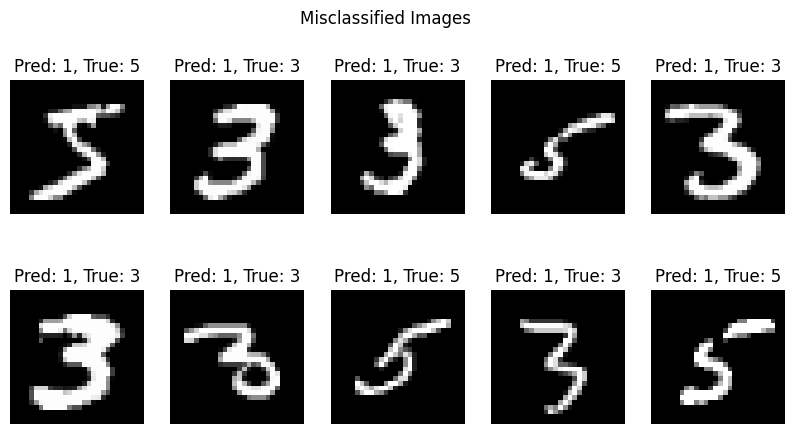

In [33]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")